Tung 1 lần: [1 0]
Tung 10 lần: [6 4]
Tung 100 lần: [50 50]
Tung 500 lần: [252. 248.]
Ước lượng xác suất thực nghiệm (500 lần): [0.504 0.496]
3 thí nghiệm, mỗi lần 10 lần tung:
 [[2 8]
 [5 5]
 [6 4]]
Tổng số sấp sau 500 lần: 261
Tổng số ngửa sau 500 lần: 239
Ước lượng xác suất sau 500 lần tung: [np.float64(0.522), np.float64(0.478)]


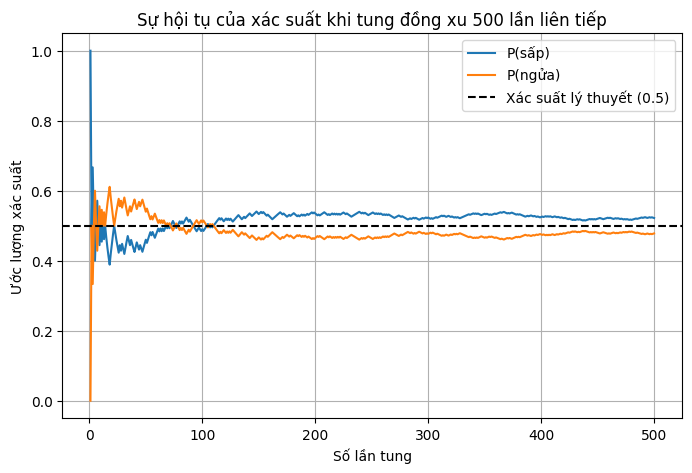

In [1]:
# Cài đặt thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt

# Xác suất lý thuyết của đồng xu cân đối50% sấp (0), 50% ngửa (1)
fair_probs = [0.5, 0.5]

# --- Tung thử đồng xu đơn lẻ ---
# Tung 1 lần (trả về 1-hot vector)
print("Tung 1 lần:", np.random.multinomial(1, fair_probs))

# Tung 10 lần
print("Tung 10 lần:", np.random.multinomial(10, fair_probs))

# Tung 100 lần
print("Tung 100 lần:", np.random.multinomial(100, fair_probs))

# Tung 500 lần
counts_500 = np.random.multinomial(500, fair_probs).astype(np.float32)
print("Tung 500 lần:", counts_500)
print("Ước lượng xác suất thực nghiệm (500 lần):", counts_500 / 500)

# Thực hiện 3 thí nghiệm, mỗi thí nghiệm 10 lần tung
counts = np.random.multinomial(10, fair_probs, size=3)
print("3 thí nghiệm, mỗi lần 10 lần tung:\n", counts)

# --- Thực nghiệm 500 lần tung liên tiếp ---
num_tosses = 500
# Mô phỏng 500 lần tung: 0 = "sấp", 1 = "ngửa"
outcomes = np.random.choice([0, 1], size=num_tosses, p=fair_probs)

# Tính tổng cộng dồn số sấp (0) và ngửa (1) sau mỗi lần tung
cum_tails = np.cumsum(outcomes == 0)  # số sấp cộng dồn
cum_heads = np.cumsum(outcomes == 1)  # số ngửa cộng dồn

# Tạo mảng [1, 2, ..., 500] để chia lấy tỉ lệ
trial_indices = np.arange(1, num_tosses + 1)

# Ước lượng xác suất sấp và ngửa sau mỗi lần tung
est_tails = cum_tails / trial_indices
est_heads = cum_heads / trial_indices

# In kết quả sau 500 lần tung
print(f"Tổng số sấp sau {num_tosses} lần:", cum_tails[-1])
print(f"Tổng số ngửa sau {num_tosses} lần:", cum_heads[-1])
print("Ước lượng xác suất sau 500 lần tung:",
      [est_tails[-1], est_heads[-1]])

# Vẽ biểu đồ hội tụ của xác suất
plt.figure(figsize=(8, 5))
plt.plot(trial_indices, est_tails, label="P(sấp)")
plt.plot(trial_indices, est_heads, label="P(ngửa)")
plt.axhline(y=0.5, color='black', linestyle='dashed', label='Xác suất lý thuyết (0.5)')
plt.xlabel('Số lần tung')
plt.ylabel('Ước lượng xác suất')
plt.title('Sự hội tụ của xác suất khi tung đồng xu 500 lần liên tiếp')
plt.legend()
plt.grid(True)
plt.show()